### Context
### ...

### On Importe les librairies nécessaires 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import ast

In [2]:
sns.set_theme()

### On Importe les données des joueurs Platine et Challenger

In [3]:
DataPlat = pd.read_csv('Data/TFT_Platinum_MatchData.csv');
DataChall = pd.read_csv('Data/TFT_Challenger_MatchData.csv');

### Afin de garder l'indexation et avoir une lecture des données plus rapide, nous allons garder seulement les 1000 premières parties

In [4]:
DataPlat = DataPlat.head(1000)
DataChall = DataChall.head(1000)

DataPlat
# DataChall

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4291707834,1963.905273,6,27,5,1390.165771,"{'Cybernetic': 1, 'Demolitionist': 1, 'Infiltr...","{'Ziggs': {'items': [7], 'star': 1}, 'Ashe': {..."
1,KR_4291707834,1963.905273,8,37,3,1891.282715,"{'Blaster': 1, 'Chrono': 1, 'Cybernetic': 4, '...","{'Ziggs': {'items': [24], 'star': 3}, 'Fiora':..."
2,KR_4291707834,1963.905273,6,25,7,1279.461060,"{'Blaster': 1, 'Cybernetic': 1, 'DarkStar': 2,...","{'Fiora': {'items': [1], 'star': 1}, 'Shaco': ..."
3,KR_4291707834,1963.905273,7,38,2,1955.608521,"{'DarkStar': 1, 'Protector': 2, 'Set3_Blademas...","{'Poppy': {'items': [], 'star': 2}, 'Xayah': {..."
4,KR_4291707834,1963.905273,8,38,1,1955.608521,"{'Blaster': 1, 'Chrono': 5, 'DarkStar': 3, 'Pr...","{'TwistedFate': {'items': [36, 27], 'star': 3}..."
...,...,...,...,...,...,...,...,...
995,KR_4389301206,1988.682129,8,30,8,1626.902222,"{'Blaster': 1, 'Chrono': 1, 'DarkStar': 1, 'De...","{'TwistedFate': {'items': [], 'star': 1}, 'Gra..."
996,KR_4389301206,1988.682129,8,31,7,1683.837524,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [44, 44, 39], 'star': 2}, ..."
997,KR_4389301206,1988.682129,8,35,3,1908.315430,"{'Blaster': 1, 'Chrono': 2, 'Demolitionist': 2...","{'Graves': {'items': [], 'star': 3}, 'Xayah': ..."
998,KR_4389301206,1988.682129,9,37,1,1980.388916,"{'Chrono': 2, 'Cybernetic': 1, 'DarkStar': 1, ...","{'Caitlyn': {'items': [], 'star': 2}, 'JarvanI..."


In [5]:
DataPlat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gameId          1000 non-null   object 
 1   gameDuration    1000 non-null   float64
 2   level           1000 non-null   int64  
 3   lastRound       1000 non-null   int64  
 4   Ranked          1000 non-null   int64  
 5   ingameDuration  1000 non-null   float64
 6   combination     1000 non-null   object 
 7   champion        1000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


### Nous allons récupérer seulement la composition principale de chaque joueur afin d'avoir une analyse pertinente (colonne "combination").

### Pour cela on récupéré seulement la composition qui contient de plus de personnages, s'il y en a plusieurs a la même valeur alors on les associe

In [6]:
DataPlat.insert(8, "composition", "Any")
DataChall.insert(8, "composition", "Any")

DataPlat

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion,composition
0,KR_4291707834,1963.905273,6,27,5,1390.165771,"{'Cybernetic': 1, 'Demolitionist': 1, 'Infiltr...","{'Ziggs': {'items': [7], 'star': 1}, 'Ashe': {...",Any
1,KR_4291707834,1963.905273,8,37,3,1891.282715,"{'Blaster': 1, 'Chrono': 1, 'Cybernetic': 4, '...","{'Ziggs': {'items': [24], 'star': 3}, 'Fiora':...",Any
2,KR_4291707834,1963.905273,6,25,7,1279.461060,"{'Blaster': 1, 'Cybernetic': 1, 'DarkStar': 2,...","{'Fiora': {'items': [1], 'star': 1}, 'Shaco': ...",Any
3,KR_4291707834,1963.905273,7,38,2,1955.608521,"{'DarkStar': 1, 'Protector': 2, 'Set3_Blademas...","{'Poppy': {'items': [], 'star': 2}, 'Xayah': {...",Any
4,KR_4291707834,1963.905273,8,38,1,1955.608521,"{'Blaster': 1, 'Chrono': 5, 'DarkStar': 3, 'Pr...","{'TwistedFate': {'items': [36, 27], 'star': 3}...",Any
...,...,...,...,...,...,...,...,...,...
995,KR_4389301206,1988.682129,8,30,8,1626.902222,"{'Blaster': 1, 'Chrono': 1, 'DarkStar': 1, 'De...","{'TwistedFate': {'items': [], 'star': 1}, 'Gra...",Any
996,KR_4389301206,1988.682129,8,31,7,1683.837524,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [44, 44, 39], 'star': 2}, ...",Any
997,KR_4389301206,1988.682129,8,35,3,1908.315430,"{'Blaster': 1, 'Chrono': 2, 'Demolitionist': 2...","{'Graves': {'items': [], 'star': 3}, 'Xayah': ...",Any
998,KR_4389301206,1988.682129,9,37,1,1980.388916,"{'Chrono': 2, 'Cybernetic': 1, 'DarkStar': 1, ...","{'Caitlyn': {'items': [], 'star': 2}, 'JarvanI...",Any


In [7]:
for i in range(len(DataPlat)) : 
    
    if len(ast.literal_eval(DataPlat.combination[i])) > 0 :

        max_value = max(ast.literal_eval(DataPlat.combination[i]).values())
        max_keys = [k for k, v in ast.literal_eval(DataPlat.combination[i]).items() if v == max_value]

        if len(max_keys) == 1 :
            result = max_keys[0]
        elif len(max_keys) > 1 :
            result = ""
            for i in range(len(max_keys) - 1) :
                result = result + max_keys[i] +"/"
        else :
            result = "Any"
            
#         print(result)
        DataPlat.composition[i] = result

<ipython-input-7-017131ad9fe0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataPlat.composition[i] = result


In [8]:
for i in range(len(DataChall)) : 
    
    if len(ast.literal_eval(DataChall.combination[i])) > 0 :

        max_value = max(ast.literal_eval(DataChall.combination[i]).values())
        max_keys = [k for k, v in ast.literal_eval(DataChall.combination[i]).items() if v == max_value]

        if len(max_keys) == 1 :
            result = max_keys[0]
        elif len(max_keys) > 1 :
            result = ""
            for i in range(len(max_keys) - 1) :
                result = result + max_keys[i] +"/"
        else :
            result = "Any"
            
#         print(result)
        DataChall.composition[i] = result

<ipython-input-8-66f5b3b139a3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataChall.composition[i] = result


### On récupère donc une nouvelle colonne "composition" avec la combinaison principale du joueur

In [9]:
# DataChall
DataPlat

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion,composition
0,KR_4291707834,1963.905273,6,27,5,1390.165771,"{'Cybernetic': 1, 'Demolitionist': 1, 'Infiltr...","{'Ziggs': {'items': [7], 'star': 1}, 'Ashe': {...",Set3_Sorcerer/
1,KR_4291707834,1963.905273,8,37,3,1891.282715,"{'Blaster': 1, 'Chrono': 1, 'Cybernetic': 4, '...","{'Ziggs': {'items': [24], 'star': 3}, 'Fiora':...",Chrono/ManaReaver/
2,KR_4291707834,1963.905273,6,25,7,1279.461060,"{'Blaster': 1, 'Cybernetic': 1, 'DarkStar': 2,...","{'Fiora': {'items': [1], 'star': 1}, 'Shaco': ...",Chrono/Set3_Blademaster/Valkyrie/
3,KR_4291707834,1963.905273,7,38,2,1955.608521,"{'DarkStar': 1, 'Protector': 2, 'Set3_Blademas...","{'Poppy': {'items': [], 'star': 2}, 'Xayah': {...",Demolitionist/Set3_Celestial/Sniper/SpacePirate/
4,KR_4291707834,1963.905273,8,38,1,1955.608521,"{'Blaster': 1, 'Chrono': 5, 'DarkStar': 3, 'Pr...","{'TwistedFate': {'items': [36, 27], 'star': 3}...",Rebel/Set3_Blademaster/Set3_Celestial/Sniper/S...
...,...,...,...,...,...,...,...,...,...
995,KR_4389301206,1988.682129,8,30,8,1626.902222,"{'Blaster': 1, 'Chrono': 1, 'DarkStar': 1, 'De...","{'TwistedFate': {'items': [], 'star': 1}, 'Gra...",Any
996,KR_4389301206,1988.682129,8,31,7,1683.837524,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [44, 44, 39], 'star': 2}, ...",Rebel
997,KR_4389301206,1988.682129,8,35,3,1908.315430,"{'Blaster': 1, 'Chrono': 2, 'Demolitionist': 2...","{'Graves': {'items': [], 'star': 3}, 'Xayah': ...",SpacePirate
998,KR_4389301206,1988.682129,9,37,1,1980.388916,"{'Chrono': 2, 'Cybernetic': 1, 'DarkStar': 1, ...","{'Caitlyn': {'items': [], 'star': 2}, 'JarvanI...",Set3_Celestial


### On peut donc maintenant enlever la colonne "combination" que l'on a refait selon notre besoin et supprimer la colonne "champion" qui n'est pas utile a l'analyse

In [10]:
DataPlat = DataPlat.drop(columns=["combination", "champion"], axis='columns')
DataChall = DataChall.drop(columns=["combination", "champion"], axis='columns')

DataPlat

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,composition
0,KR_4291707834,1963.905273,6,27,5,1390.165771,Set3_Sorcerer/
1,KR_4291707834,1963.905273,8,37,3,1891.282715,Chrono/ManaReaver/
2,KR_4291707834,1963.905273,6,25,7,1279.461060,Chrono/Set3_Blademaster/Valkyrie/
3,KR_4291707834,1963.905273,7,38,2,1955.608521,Demolitionist/Set3_Celestial/Sniper/SpacePirate/
4,KR_4291707834,1963.905273,8,38,1,1955.608521,Rebel/Set3_Blademaster/Set3_Celestial/Sniper/S...
...,...,...,...,...,...,...,...
995,KR_4389301206,1988.682129,8,30,8,1626.902222,Any
996,KR_4389301206,1988.682129,8,31,7,1683.837524,Rebel
997,KR_4389301206,1988.682129,8,35,3,1908.315430,SpacePirate
998,KR_4389301206,1988.682129,9,37,1,1980.388916,Set3_Celestial


### On supprime toutes les données ou le joueur a revendu sa composition avant la fin de partie pour ne pas fausser les données

In [11]:
to_delPlat = DataPlat[DataPlat["composition"] == "Any"].index.tolist()
to_delChall = DataChall[DataChall["composition"] == "Any"].index.tolist()

DataPlat= DataPlat.drop(to_delPlat)
DataChall= DataChall.drop(to_delChall)

DataPlat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gameId          776 non-null    object 
 1   gameDuration    776 non-null    float64
 2   level           776 non-null    int64  
 3   lastRound       776 non-null    int64  
 4   Ranked          776 non-null    int64  
 5   ingameDuration  776 non-null    float64
 6   composition     776 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.5+ KB


In [12]:
DataPlat

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,composition
0,KR_4291707834,1963.905273,6,27,5,1390.165771,Set3_Sorcerer/
1,KR_4291707834,1963.905273,8,37,3,1891.282715,Chrono/ManaReaver/
2,KR_4291707834,1963.905273,6,25,7,1279.461060,Chrono/Set3_Blademaster/Valkyrie/
3,KR_4291707834,1963.905273,7,38,2,1955.608521,Demolitionist/Set3_Celestial/Sniper/SpacePirate/
4,KR_4291707834,1963.905273,8,38,1,1955.608521,Rebel/Set3_Blademaster/Set3_Celestial/Sniper/S...
...,...,...,...,...,...,...,...
994,KR_4389301206,1988.682129,7,37,2,1980.388916,Infiltrator
996,KR_4389301206,1988.682129,8,31,7,1683.837524,Rebel
997,KR_4389301206,1988.682129,8,35,3,1908.315430,SpacePirate
998,KR_4389301206,1988.682129,9,37,1,1980.388916,Set3_Celestial


### Maintenant que nos données sont prêtes, on va chercher à comprendre la différence entre les joueurs Platine et Challenger

### Dans un premier temps comparons le niveau atteint des joueurs en fin de partie

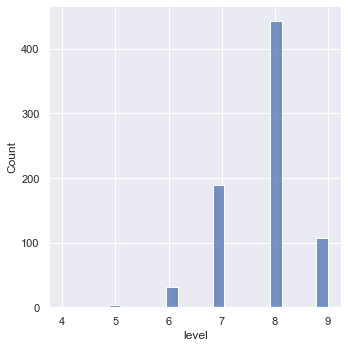

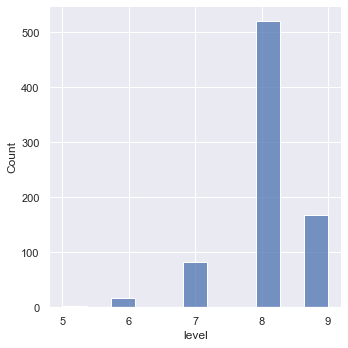

In [53]:
sns.displot(x="level",data=DataPlat)
sns.displot(x="level",data=DataChall)

### Comme on peut le constater les joueurs challenger ont plus tendance à atteindre le niveau 9 que les platines qui eux ont plus de joueurs niveau 6 et 7.
### Cependant on remarque que des deux cotés une majorité termine la partie au niveau 8

### Nous allons donc voir si le niveau atteint en fin de partie influe sur la victoire chez les challengers, sachant que un "Rank" 1,2,3 ou 4 est une victoire et que 5,6,7 et 8 sont une défaite

### On va donc interprété la donnée de cette façon 1=Victoire et 0=Defaite

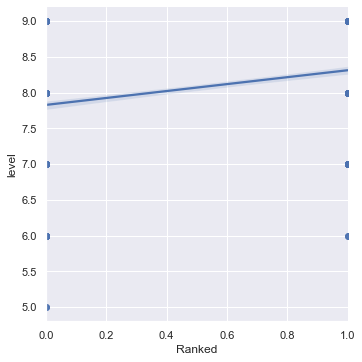

In [23]:
DataChall01 = DataChall.copy()
DataPlat01 = DataPlat.copy()
DataChall01.Ranked = DataChall01.Ranked.replace(to_replace = [2,3,4,5,6,7,8] , value=[1,1,1,0,0,0,0])
DataPlat01.Ranked = DataPlat01.Ranked.replace(to_replace = [2,3,4,5,6,7,8] , value=[1,1,1,0,0,0,0])

sns.lmplot(x="Ranked", y="level", data=DataChall01)

### On remarque donc que plus le joueur tend vers le niveau 9 plus il tend vers une victoire

### On peut donc en supposer que atteindre le niveau 9 augmente nos chances de gagner

### Notre but est de comprendre comment devenir challenger, nous allons créer une heatmap afin de voir quelle sont les facteurs les plus importants pour obtenir une victoire en challenger

In [39]:
DataCorrPlat = DataPlat01.corr()
DataCorrChall = DataChall01.corr()

# DataCorrPlat
DataCorrChall

,gameDuration,level,lastRound,Ranked,ingameDuration
gameDuration,1.000000,0.022100,0.159967,-0.018486,0.319016
level,0.022100,1.000000,0.527782,0.374191,0.496557
lastRound,0.159967,0.527782,1.000000,0.751264,0.952496
Ranked,-0.018486,0.374191,0.751264,1.000000,0.720364
ingameDuration,0.319016,0.496557,0.952496,0.720364,1.000000


<AxesSubplot:>

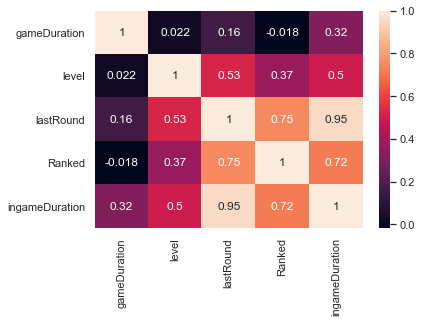

In [57]:
sns.heatmap(DataCorrChall, annot=True)

### On comprend donc que les facteurs les plus important pour obtenir une victoire ("Ranked"), sont le "lastRound" et le "level"


### On va donc s'interesser au "lastRound"

<AxesSubplot:xlabel='lastRound', ylabel='Ranked'>

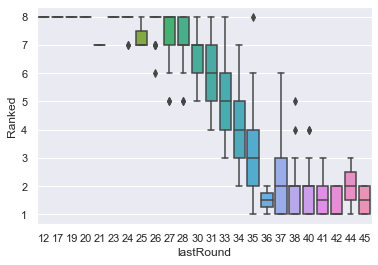

In [55]:
sns.boxplot(data=DataPlat, x="lastRound", y="Ranked")

<AxesSubplot:xlabel='lastRound', ylabel='Ranked'>

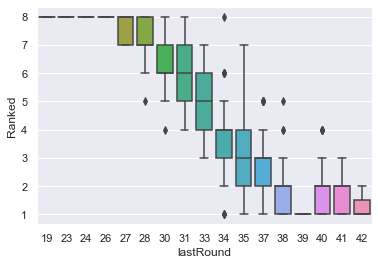

In [52]:
sns.boxplot(data=DataChall, x="lastRound", y="Ranked")

### On peut donc supposer ici que les parties des joueurs Challenger sont bien plus radicales que les parties des joueurs Platine, en effet, les premiers joueurs Challenger éliminés sont au round 27 contre 25 en Platine.
### Malgré cela, les joueurs Challenger finissent les parties en moins de round aussi 42 maximum contre 45 chez les Platine.
### Désormais, nous allons voir les différences des compositions jouées et leurs taux de victoire

<AxesSubplot:xlabel='Ranked', ylabel='composition'>

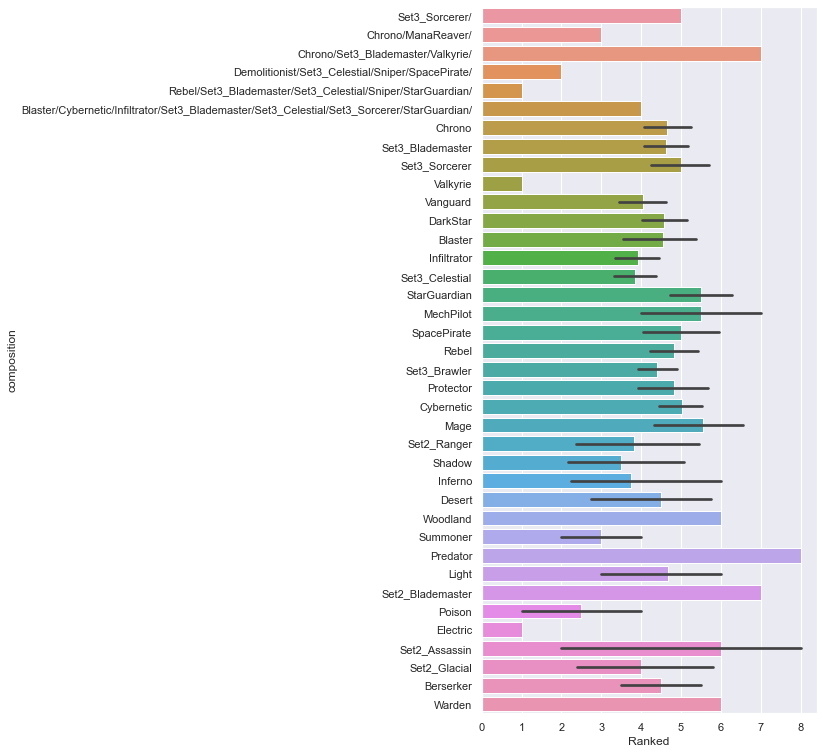

In [59]:
plt.subplots(figsize=(6,13))
sns.barplot(y="composition", x="Ranked" , data=DataPlat)

<AxesSubplot:xlabel='Ranked', ylabel='composition'>

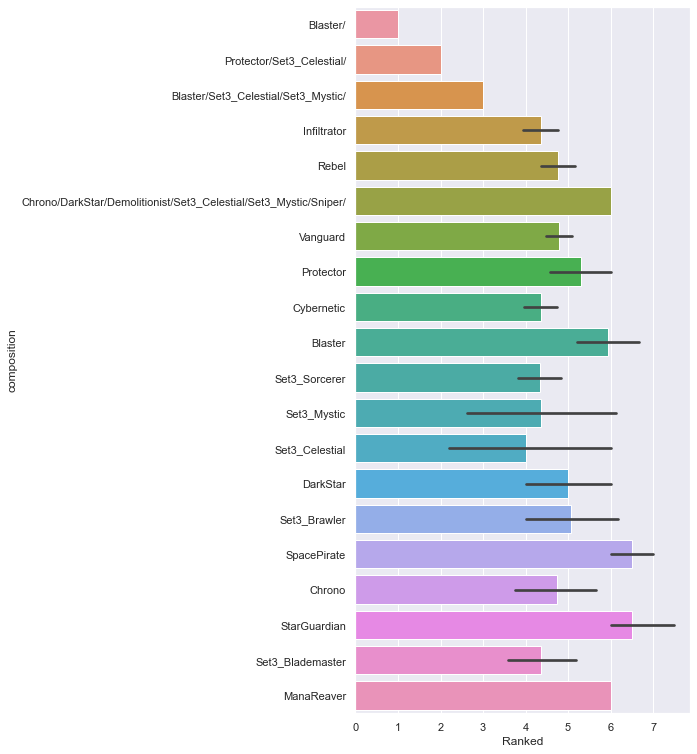

In [19]:
plt.subplots(figsize=(6,13))
sns.barplot(y="composition", x="Ranked" , data=DataChall,)

### On peut constater que les joueurs Challenger joue une variété de composition plus résrteinte que les Platine
### Cepednant on peut voir cetaine composition sortir du lot des deux cotés comme "Set3_Celestial"

### Notre dernier critère a abordé est le temps qu'on reste dans une partie ("ingameDuration"), nous allons donc voir s'il influe sur nos conditions de victoire

(1400.0, 2600.0)

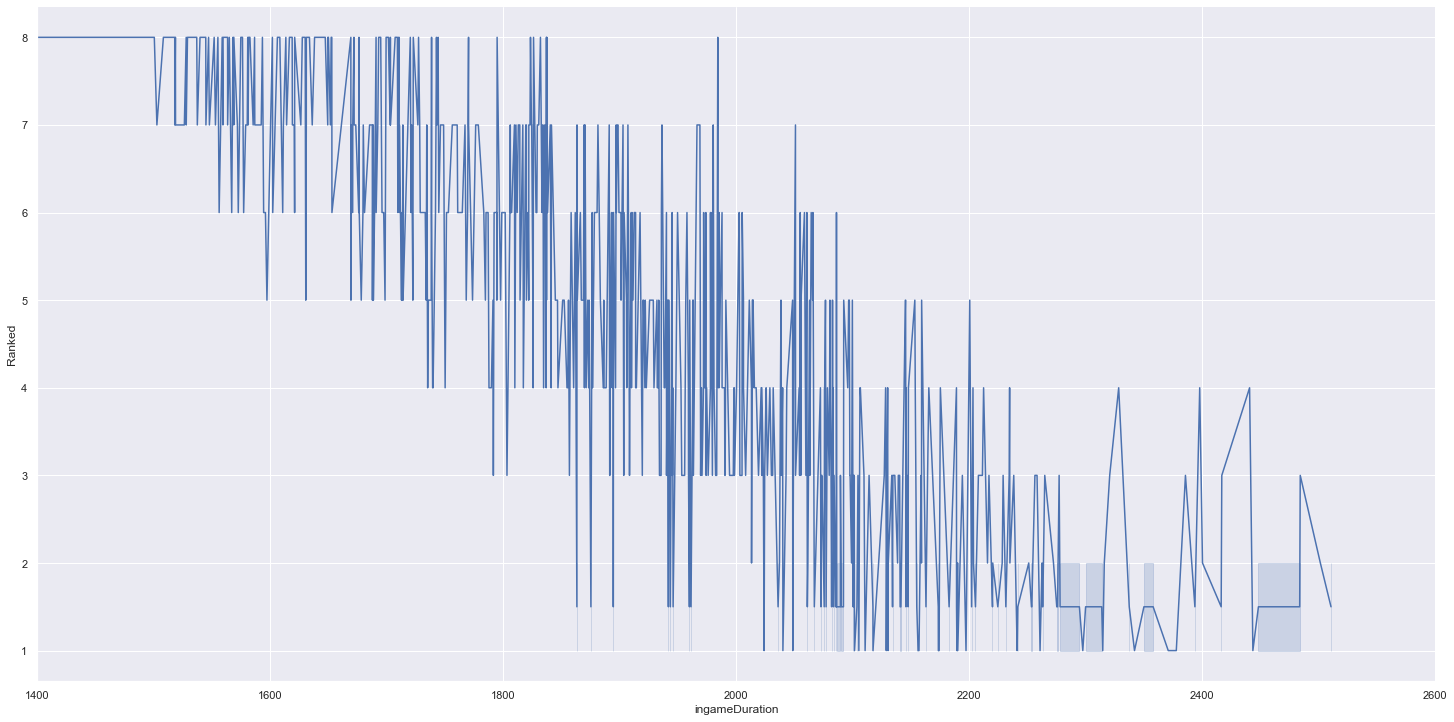

In [38]:
sns.relplot(data=DataChall, x="ingameDuration", y="Ranked",height=10, aspect=2, kind="line")
plt.xlim(1400,2600)

### On peux donc supposer que le temps qu'on reste dans la partie n'est pas réellement représentatif car il y a beaucoup trop de variance.
### Cependant on peut constater que les joueurs qui restent en dessous de 1700 perde forcément et que les joueurs que reste plus de 2300 gagne forcément 

